In [1]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


Bad key "text.kerning_factor" on line 4 in
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [3]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp


,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,0.0,-0.005042,0.006361,1.567715,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,0.0,-0.001514,-0.009787,0.946463,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,0.0,-0.005869,-0.024194,6.252890,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.0,0.002599,-0.001359,-0.473211,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,0.0,-0.002420,0.004862,1.776159,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,0.0,-0.001801,-0.007760,-2.365016,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.0,0.001977,-0.003229,-0.770855,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,0.0,-0.005964,0.005382,3.785917,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,0.0,-0.030275,-0.063700,27.234844,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [4]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [5]:
tox_list=['BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative'
         ]

In [6]:
our_data=toxcast.reindex(columns=tox_list)

In [7]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from sklearn.feature_selection import VarianceThreshold



In [9]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [10]:
from sklearn.feature_selection import VarianceThreshold




In [11]:
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.

    


In [12]:
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [14]:

def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

In [15]:
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


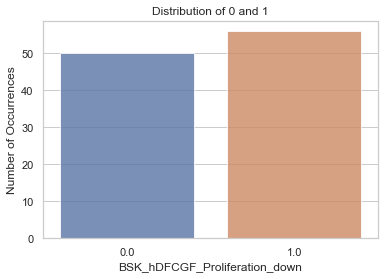

Total Compounds in Assay:  106
Total Selected CP features:  96
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    5.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   14.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   26.4s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:   42.2s
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 5]
 [4 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.56      0.50      0.53        10
         1.0       0.62      0.67      0.64        12

    accuracy                           0.59        22
   macro avg       0.59      0.58      0.58        22
weighted avg       0.59      0.59      0.59        22

Total Selected CP features:  101
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    5.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   15.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   27.2s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:   43.1s
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 4]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55        10
         1.0       0.56      0.45      0.50        11

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21

Total Selected CP features:  138
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    8.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   22.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   42.8s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  4.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 3]
 [5 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.58      0.70      0.64        10
         1.0       0.67      0.55      0.60        11

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.63      0.62      0.62        21

Total Selected CP features:  106
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   30.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   57.5s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 3]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        10
         1.0       0.70      0.64      0.67        11

    accuracy                           0.67        21
   macro avg       0.67      0.67      0.67        21
weighted avg       0.67      0.67      0.67        21

Total Selected CP features:  26
Total Sel

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   39.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 4]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.60      0.60        10
         1.0       0.64      0.64      0.64        11

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.62      0.62      0.62        21



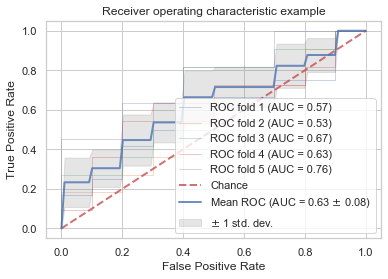

Mean of Each fold


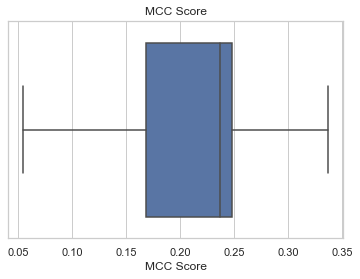

Matthews_corrcoef all:  [0.16878989451394444, 0.05504818825631803, 0.24771684715343112, 0.33636363636363636, 0.23636363636363636]
Matthews_corrcoef mean:  0.20885644053019328


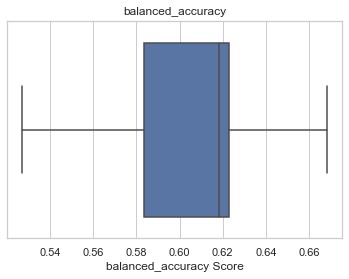

balanced_accuracy all:  [0.5833333333333333, 0.5272727272727272, 0.6227272727272727, 0.6681818181818182, 0.6181818181818182]
balanced_accuracy mean:  0.6039393939393939


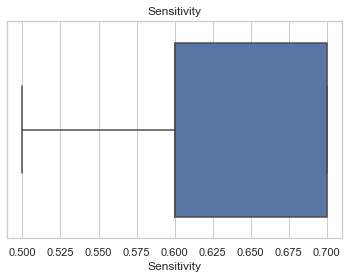

Sensitivity all:  [0.5, 0.6, 0.7, 0.7, 0.6]
Sensitivity mean:  0.62


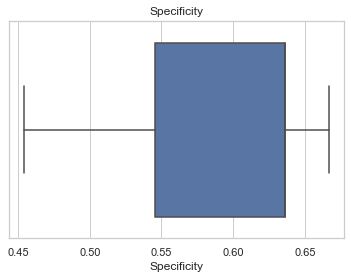

Specificity all:  [0.6666666666666666, 0.45454545454545453, 0.5454545454545454, 0.6363636363636364, 0.6363636363636364]
Specificity mean:  0.5878787878787878
One Combined Confusion Matrix
conf_matrix: 
  [[31 19]
 [23 33]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.62      0.60        50
         1.0       0.63      0.59      0.61        56

    accuracy                           0.60       106
   macro avg       0.60      0.60      0.60       106
weighted avg       0.61      0.60      0.60       106

matthews_corrcoef
0.20898737384282914
balanced_accuracy_score
0.6046428571428571
Sensitivity
0.62
Specificity
0.5892857142857143
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6267857142857143


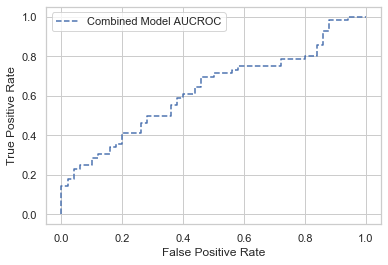

Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


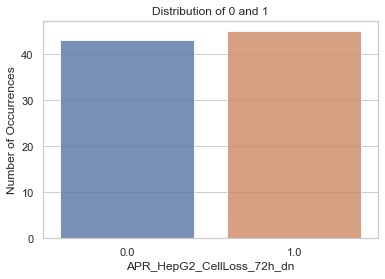

Total Compounds in Assay:  88
Total Selected CP features:  36
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 2]
 [2 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78         9
         1.0       0.78      0.78      0.78         9

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18

Total Selected CP features:  107
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   42.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 1]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.89      0.73         9
         1.0       0.80      0.44      0.57         9

    accuracy                           0.67        18
   macro avg       0.71      0.67      0.65        18
weighted avg       0.71      0.67      0.65        18

Total Selected CP features:  135
Total Se

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   15.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   45.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 0]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         9
         1.0       1.00      0.33      0.50         9

    accuracy                           0.67        18
   macro avg       0.80      0.67      0.62        18
weighted avg       0.80      0.67      0.62        18

Total Selected CP features:  69
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.9s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.75      0.71         8
         1.0       0.75      0.67      0.71         9

    accuracy                           0.71        17
   macro avg       0.71      0.71      0.71        17
weighted avg       0.71      0.71      0.71        17

Total Selected CP features:  102
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 3]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.62      0.56         8
         1.0       0.57      0.44      0.50         9

    accuracy                           0.53        17
   macro avg       0.54      0.53      0.53        17
weighted avg       0.54      0.53      0.53        17



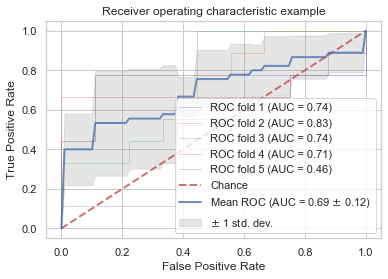

Mean of Each fold


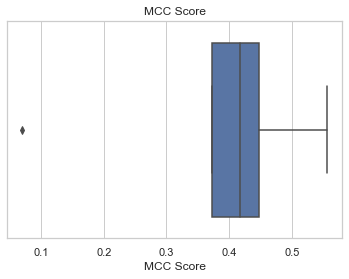

Matthews_corrcoef all:  [0.5555555555555556, 0.3721042037676254, 0.4472135954999579, 0.4166666666666667, 0.07042952122737638]
Matthews_corrcoef mean:  0.3723939085434364


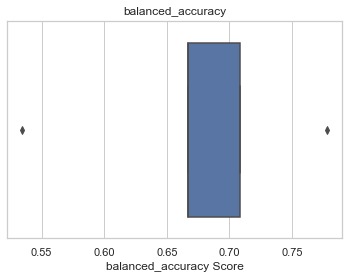

balanced_accuracy all:  [0.7777777777777778, 0.6666666666666666, 0.6666666666666666, 0.7083333333333333, 0.5347222222222222]
balanced_accuracy mean:  0.6708333333333334


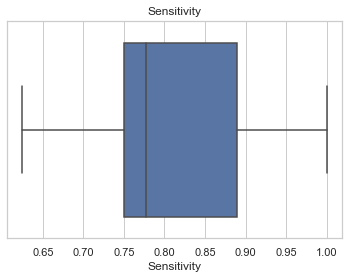

Sensitivity all:  [0.7777777777777778, 0.8888888888888888, 1.0, 0.75, 0.625]
Sensitivity mean:  0.8083333333333332


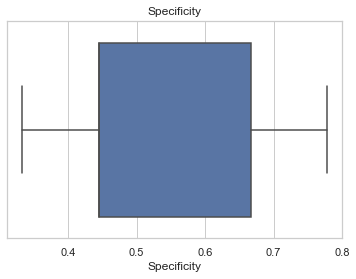

Specificity all:  [0.7777777777777778, 0.4444444444444444, 0.3333333333333333, 0.6666666666666666, 0.4444444444444444]
Specificity mean:  0.5333333333333334
One Combined Confusion Matrix
conf_matrix: 
  [[35  8]
 [21 24]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.81      0.71        43
         1.0       0.75      0.53      0.62        45

    accuracy                           0.67        88
   macro avg       0.69      0.67      0.67        88
weighted avg       0.69      0.67      0.66        88

matthews_corrcoef
0.36087748355852695
balanced_accuracy_score
0.6736434108527132
Sensitivity
0.813953488372093
Specificity
0.5333333333333333
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6801033591731266


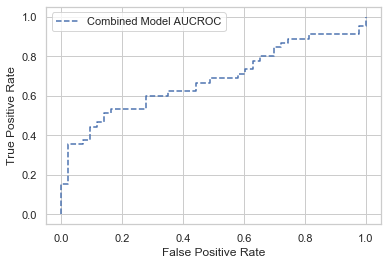

Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


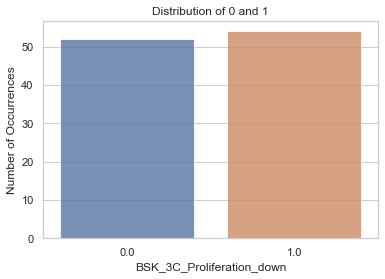

Total Compounds in Assay:  106
Total Selected CP features:  76
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   46.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [8 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.73      0.59        11
         1.0       0.50      0.27      0.35        11

    accuracy                           0.50        22
   macro avg       0.50      0.50      0.47        22
weighted avg       0.50      0.50      0.47        22

Total Selected CP features:  43
Total Selected 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 2]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        10
         1.0       0.78      0.64      0.70        11

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.72      0.71      0.71        21

Total Selected CP features:  120
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 6]
 [5 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.44      0.40      0.42        10
         1.0       0.50      0.55      0.52        11

    accuracy                           0.48        21
   macro avg       0.47      0.47      0.47        21
weighted avg       0.47      0.48      0.47        21

Total Selected CP features:  113
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 1]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        10
         1.0       0.83      0.45      0.59        11

    accuracy                           0.67        21
   macro avg       0.72      0.68      0.65        21
weighted avg       0.72      0.67      0.65        21

Total Selected CP features:  54
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 4]
 [4 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        11
         1.0       0.60      0.60      0.60        10

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.62      0.62      0.62        21



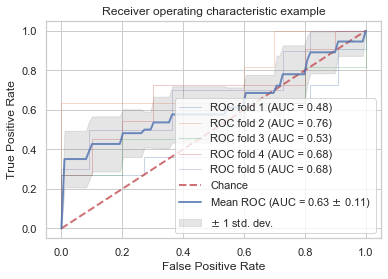

Mean of Each fold


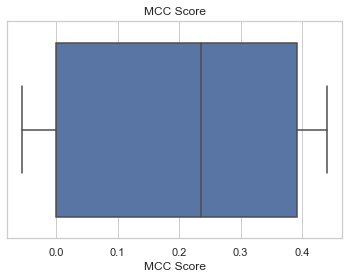

Matthews_corrcoef all:  [0.0, 0.4403855060505442, -0.05504818825631803, 0.3919647479510927, 0.23636363636363636]
Matthews_corrcoef mean:  0.20273314042179105


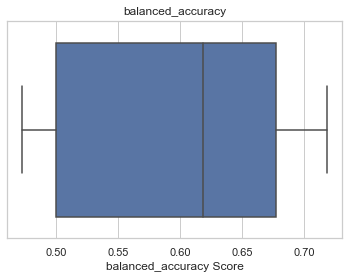

balanced_accuracy all:  [0.5, 0.7181818181818183, 0.4727272727272727, 0.6772727272727272, 0.6181818181818182]
balanced_accuracy mean:  0.5972727272727273


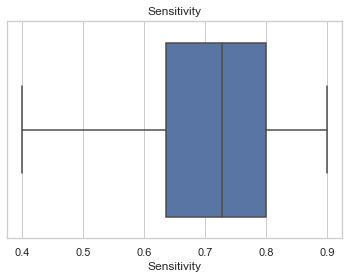

Sensitivity all:  [0.7272727272727273, 0.8, 0.4, 0.9, 0.6363636363636364]
Sensitivity mean:  0.6927272727272726


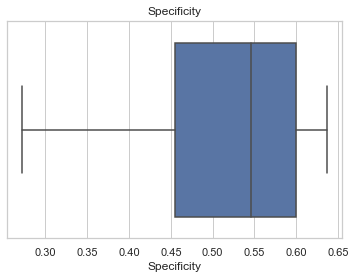

Specificity all:  [0.2727272727272727, 0.6363636363636364, 0.5454545454545454, 0.45454545454545453, 0.6]
Specificity mean:  0.5018181818181818
One Combined Confusion Matrix
conf_matrix: 
  [[36 16]
 [27 27]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.69      0.63        52
         1.0       0.63      0.50      0.56        54

    accuracy                           0.59       106
   macro avg       0.60      0.60      0.59       106
weighted avg       0.60      0.59      0.59       106

matthews_corrcoef
0.19579008980025475
balanced_accuracy_score
0.5961538461538461
Sensitivity
0.6923076923076923
Specificity
0.5
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6353276353276353


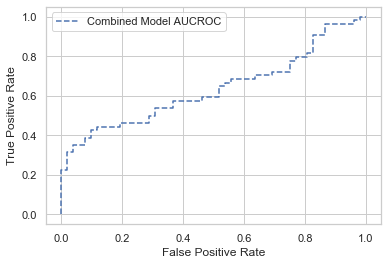

Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


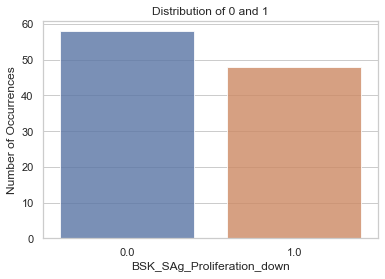

Total Compounds in Assay:  106
Total Selected CP features:  186
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   39.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  1]
 [ 6  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.92      0.76        12
         1.0       0.80      0.40      0.53        10

    accuracy                           0.68        22
   macro avg       0.72      0.66      0.65        22
weighted avg       0.72      0.68      0.66        22

Total Selected CP features:  117
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   15.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 6]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.45      0.48        11
         1.0       0.45      0.50      0.48        10

    accuracy                           0.48        21
   macro avg       0.48      0.48      0.48        21
weighted avg       0.48      0.48      0.48        21

Total Selected CP features:  186
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [6 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.73      0.64        11
         1.0       0.57      0.40      0.47        10

    accuracy                           0.57        21
   macro avg       0.57      0.56      0.56        21
weighted avg       0.57      0.57      0.56        21

Total Selected CP features:  240
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.9s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.54      0.58      0.56        12
         1.0       0.38      0.33      0.35         9

    accuracy                           0.48        21
   macro avg       0.46      0.46      0.46        21
weighted avg       0.47      0.48      0.47        21

Total Selected CP features:  105
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  1]
 [ 5  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.92      0.79        12
         1.0       0.80      0.44      0.57         9

    accuracy                           0.71        21
   macro avg       0.74      0.68      0.68        21
weighted avg       0.74      0.71      0.69        21



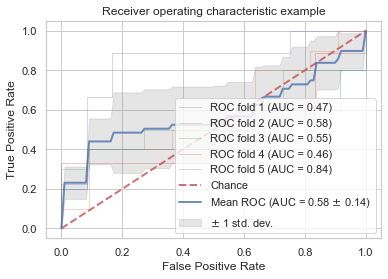

Mean of Each fold


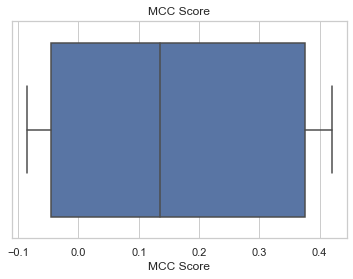

Matthews_corrcoef all:  [0.37625606633113623, -0.045454545454545456, 0.13483997249264842, -0.08492077756084468, 0.4195731958391368]
Matthews_corrcoef mean:  0.16005878232950627


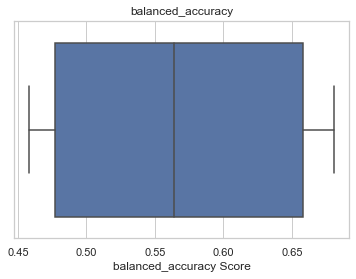

balanced_accuracy all:  [0.6583333333333333, 0.4772727272727273, 0.5636363636363637, 0.45833333333333337, 0.6805555555555556]
balanced_accuracy mean:  0.5676262626262627


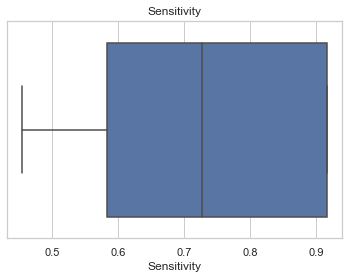

Sensitivity all:  [0.9166666666666666, 0.45454545454545453, 0.7272727272727273, 0.5833333333333334, 0.9166666666666666]
Sensitivity mean:  0.7196969696969697


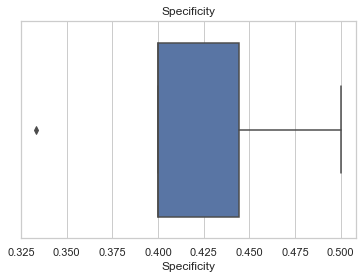

Specificity all:  [0.4, 0.5, 0.4, 0.3333333333333333, 0.4444444444444444]
Specificity mean:  0.4155555555555555
One Combined Confusion Matrix
conf_matrix: 
  [[42 16]
 [28 20]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.72      0.66        58
         1.0       0.56      0.42      0.48        48

    accuracy                           0.58       106
   macro avg       0.58      0.57      0.57       106
weighted avg       0.58      0.58      0.57       106

matthews_corrcoef
0.14799641015976975
balanced_accuracy_score
0.5704022988505747
Sensitivity
0.7241379310344828
Specificity
0.4166666666666667
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5775862068965517


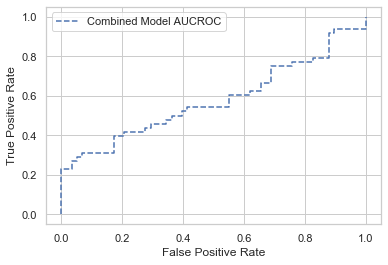

Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


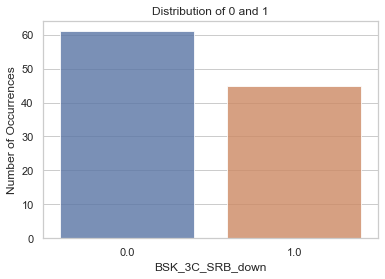

Total Compounds in Assay:  106
Total Selected CP features:  15
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 5]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.62      0.67        13
         1.0       0.55      0.67      0.60         9

    accuracy                           0.64        22
   macro avg       0.64      0.64      0.63        22
weighted avg       0.65      0.64      0.64        22

Total Selected CP features:  70
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.67      0.64        12
         1.0       0.50      0.44      0.47         9

    accuracy                           0.57        21
   macro avg       0.56      0.56      0.56        21
weighted avg       0.57      0.57      0.57        21

Total Selected CP features:  32
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  2]
 [ 5  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.83      0.74        12
         1.0       0.67      0.44      0.53         9

    accuracy                           0.67        21
   macro avg       0.67      0.64      0.64        21
weighted avg       0.67      0.67      0.65        21

Total Selected CP features:  83
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.67      0.62        12
         1.0       0.43      0.33      0.38         9

    accuracy                           0.52        21
   macro avg       0.50      0.50      0.50        21
weighted avg       0.51      0.52      0.51        21

Total Selected CP features:  30
Total Sel

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        12
         1.0       0.50      0.56      0.53         9

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.58      0.57      0.57        21



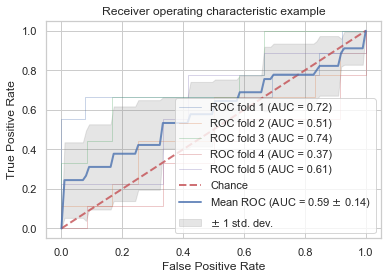

Mean of Each fold


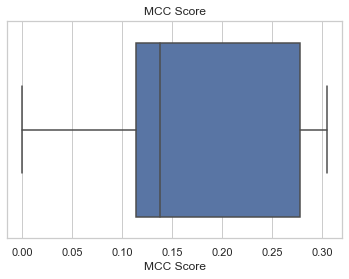

Matthews_corrcoef all:  [0.2773500981126146, 0.11322770341445958, 0.3042903097250923, 0.0, 0.13762047064079508]
Matthews_corrcoef mean:  0.1664977163785923


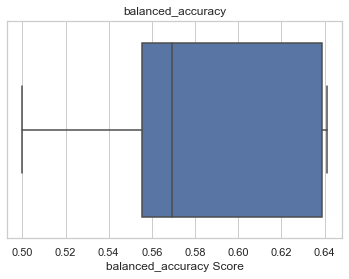

balanced_accuracy all:  [0.641025641025641, 0.5555555555555556, 0.6388888888888888, 0.5, 0.5694444444444444]
balanced_accuracy mean:  0.5809829059829059


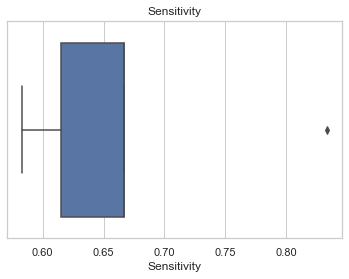

Sensitivity all:  [0.6153846153846154, 0.6666666666666666, 0.8333333333333334, 0.6666666666666666, 0.5833333333333334]
Sensitivity mean:  0.6730769230769231


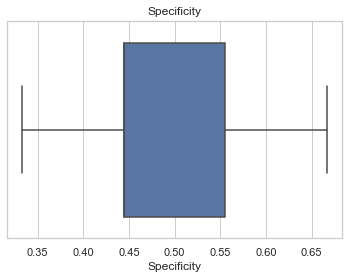

Specificity all:  [0.6666666666666666, 0.4444444444444444, 0.4444444444444444, 0.3333333333333333, 0.5555555555555556]
Specificity mean:  0.48888888888888893
One Combined Confusion Matrix
conf_matrix: 
  [[41 20]
 [23 22]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.67      0.66        61
         1.0       0.52      0.49      0.51        45

    accuracy                           0.59       106
   macro avg       0.58      0.58      0.58       106
weighted avg       0.59      0.59      0.59       106

matthews_corrcoef
0.16271832414985798
balanced_accuracy_score
0.5805100182149362
Sensitivity
0.6721311475409836
Specificity
0.4888888888888889
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5741347905282331


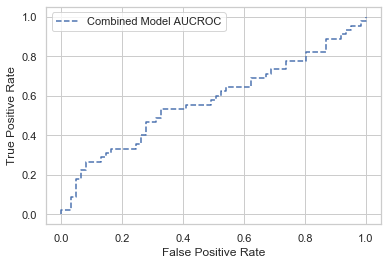

Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


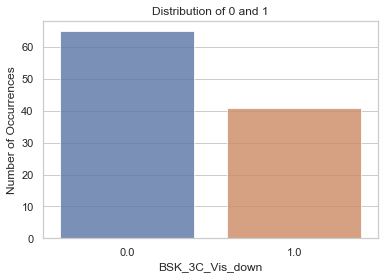

Total Compounds in Assay:  106
Total Selected CP features:  64
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   43.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 0  9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        13
         1.0       0.82      1.00      0.90         9

    accuracy                           0.91        22
   macro avg       0.91      0.92      0.91        22
weighted avg       0.93      0.91      0.91        22

Total Selected CP features:  267
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.92      0.80        13
         1.0       0.75      0.38      0.50         8

    accuracy                           0.71        21
   macro avg       0.73      0.65      0.65        21
weighted avg       0.72      0.71      0.69        21

Total Selected CP features:  80
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.1s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 3  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.81        13
         1.0       0.71      0.62      0.67         8

    accuracy                           0.76        21
   macro avg       0.75      0.74      0.74        21
weighted avg       0.76      0.76      0.76        21

Total Selected CP features:  271
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.92      0.77        13
         1.0       0.67      0.25      0.36         8

    accuracy                           0.67        21
   macro avg       0.67      0.59      0.57        21
weighted avg       0.67      0.67      0.62        21

Total Selected CP features:  252
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.85      0.76        13
         1.0       0.60      0.38      0.46         8

    accuracy                           0.67        21
   macro avg       0.64      0.61      0.61        21
weighted avg       0.65      0.67      0.65        21



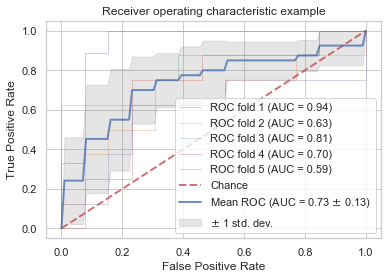

Mean of Each fold


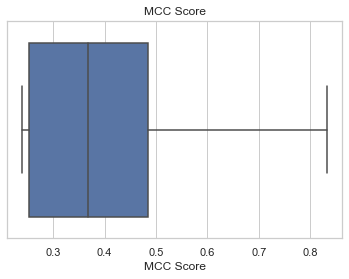

Matthews_corrcoef all:  [0.8320502943378437, 0.3686299079697329, 0.4853626716970755, 0.2401922307076307, 0.25215418055077093]
Matthews_corrcoef mean:  0.43567785705261075


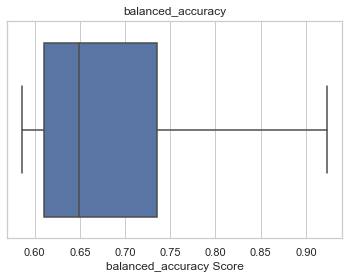

balanced_accuracy all:  [0.9230769230769231, 0.6490384615384616, 0.7355769230769231, 0.5865384615384616, 0.6105769230769231]
balanced_accuracy mean:  0.7009615384615385


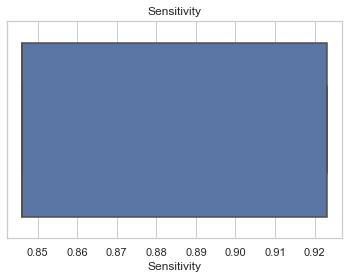

Sensitivity all:  [0.8461538461538461, 0.9230769230769231, 0.8461538461538461, 0.9230769230769231, 0.8461538461538461]
Sensitivity mean:  0.8769230769230768


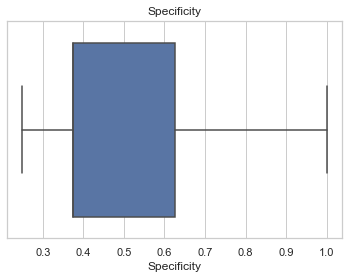

Specificity all:  [1.0, 0.375, 0.625, 0.25, 0.375]
Specificity mean:  0.525
One Combined Confusion Matrix
conf_matrix: 
  [[57  8]
 [19 22]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.88      0.81        65
         1.0       0.73      0.54      0.62        41

    accuracy                           0.75       106
   macro avg       0.74      0.71      0.71       106
weighted avg       0.74      0.75      0.74       106

matthews_corrcoef
0.4470597432209206
balanced_accuracy_score
0.7067542213883677
Sensitivity
0.8769230769230769
Specificity
0.5365853658536586
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7313320825515948


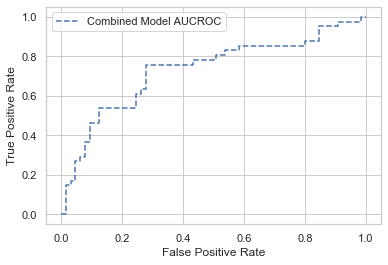

Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


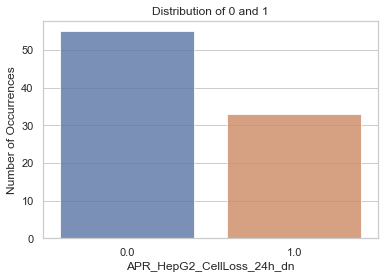

Total Compounds in Assay:  88
Total Selected CP features:  122
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 2  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        11
         1.0       1.00      0.71      0.83         7

    accuracy                           0.89        18
   macro avg       0.92      0.86      0.88        18
weighted avg       0.91      0.89      0.88        18

Total Selected CP features:  121
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  1]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.91      0.80        11
         1.0       0.75      0.43      0.55         7

    accuracy                           0.72        18
   macro avg       0.73      0.67      0.67        18
weighted avg       0.73      0.72      0.70        18

Total Selected CP features:  329
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  1]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.91      0.74        11
         1.0       0.50      0.14      0.22         7

    accuracy                           0.61        18
   macro avg       0.56      0.53      0.48        18
weighted avg       0.58      0.61      0.54        18

Total Selected CP features:  258
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85        11
         1.0       1.00      0.33      0.50         6

    accuracy                           0.76        17
   macro avg       0.87      0.67      0.67        17
weighted avg       0.83      0.76      0.72        17

Total Selected CP features:  181
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   46.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 5]
 [3 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.55      0.60        11
         1.0       0.38      0.50      0.43         6

    accuracy                           0.53        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.56      0.53      0.54        17



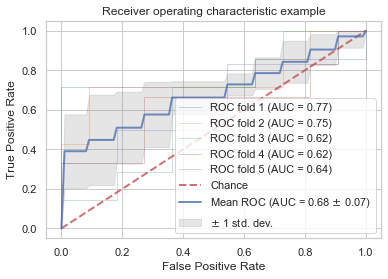

Mean of Each fold


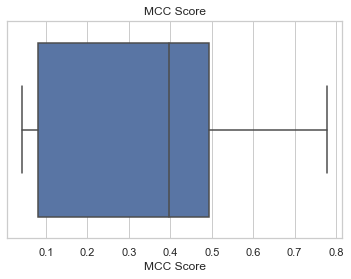

Matthews_corrcoef all:  [0.7774288420142416, 0.3959441875175622, 0.08058229640253803, 0.4944132324730442, 0.04351941398892446]
Matthews_corrcoef mean:  0.3583775944792621


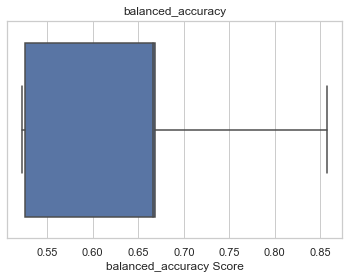

balanced_accuracy all:  [0.8571428571428572, 0.6688311688311688, 0.525974025974026, 0.6666666666666666, 0.5227272727272727]
balanced_accuracy mean:  0.6482683982683982


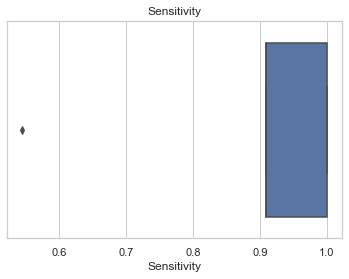

Sensitivity all:  [1.0, 0.9090909090909091, 0.9090909090909091, 1.0, 0.5454545454545454]
Sensitivity mean:  0.8727272727272727


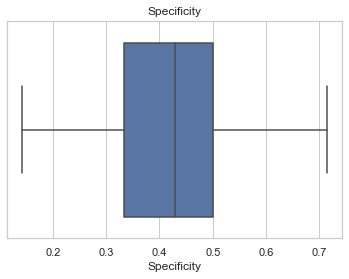

Specificity all:  [0.7142857142857143, 0.42857142857142855, 0.14285714285714285, 0.3333333333333333, 0.5]
Specificity mean:  0.42380952380952375
One Combined Confusion Matrix
conf_matrix: 
  [[48  7]
 [19 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.87      0.79        55
         1.0       0.67      0.42      0.52        33

    accuracy                           0.70        88
   macro avg       0.69      0.65      0.65        88
weighted avg       0.70      0.70      0.69        88

matthews_corrcoef
0.3372899506054637
balanced_accuracy_score
0.6484848484848484
Sensitivity
0.8727272727272727
Specificity
0.42424242424242425
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6826446280991735


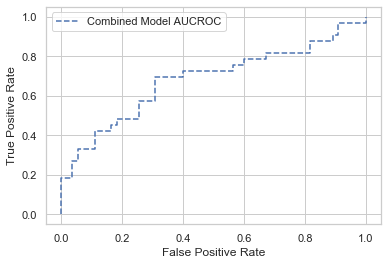

Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


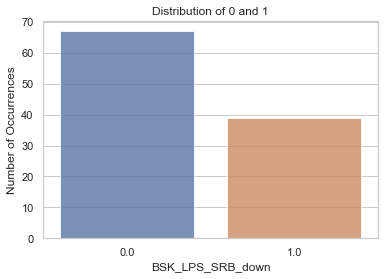

Total Compounds in Assay:  106
Total Selected CP features:  92
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   47.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  4]
 [ 3  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74        14
         1.0       0.56      0.62      0.59         8

    accuracy                           0.68        22
   macro avg       0.66      0.67      0.66        22
weighted avg       0.69      0.68      0.69        22

Total Selected CP features:  163
Total 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.1s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.85      0.76        13
         1.0       0.60      0.38      0.46         8

    accuracy                           0.67        21
   macro avg       0.64      0.61      0.61        21
weighted avg       0.65      0.67      0.65        21

Total Selected CP features:  156
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.92      0.77        13
         1.0       0.67      0.25      0.36         8

    accuracy                           0.67        21
   macro avg       0.67      0.59      0.57        21
weighted avg       0.67      0.67      0.62        21

Total Selected CP features:  75
Total Se

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 3  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.83      0.62      0.71         8

    accuracy                           0.81        21
   macro avg       0.82      0.77      0.79        21
weighted avg       0.81      0.81      0.80        21

Total Selected CP features:  87
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.9s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        14
         1.0       0.57      0.57      0.57         7

    accuracy                           0.71        21
   macro avg       0.68      0.68      0.68        21
weighted avg       0.71      0.71      0.71        21



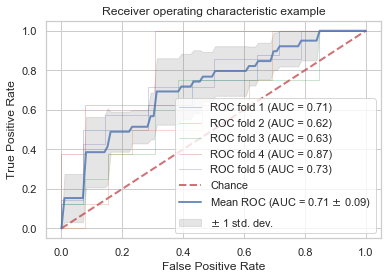

Mean of Each fold


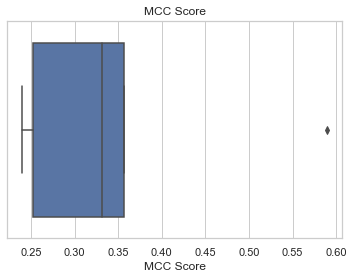

Matthews_corrcoef all:  [0.33195686496194077, 0.25215418055077093, 0.2401922307076307, 0.5891649892987402, 0.35714285714285715]
Matthews_corrcoef mean:  0.35412222453238795


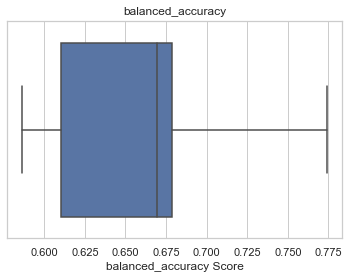

balanced_accuracy all:  [0.6696428571428572, 0.6105769230769231, 0.5865384615384616, 0.7740384615384616, 0.6785714285714286]
balanced_accuracy mean:  0.6638736263736265


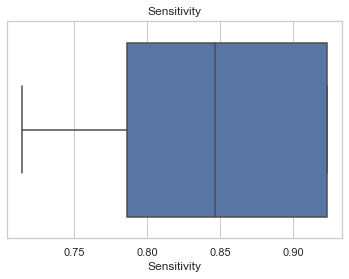

Sensitivity all:  [0.7142857142857143, 0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.7857142857142857]
Sensitivity mean:  0.8384615384615385


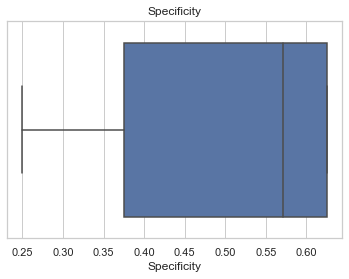

Specificity all:  [0.625, 0.375, 0.25, 0.625, 0.5714285714285714]
Specificity mean:  0.4892857142857142
One Combined Confusion Matrix
conf_matrix: 
  [[56 11]
 [20 19]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.74      0.84      0.78        67
         1.0       0.63      0.49      0.55        39

    accuracy                           0.71       106
   macro avg       0.69      0.66      0.67       106
weighted avg       0.70      0.71      0.70       106

matthews_corrcoef
0.3457843378950255
balanced_accuracy_score
0.6615001913509376
Sensitivity
0.835820895522388
Specificity
0.48717948717948717
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7118254879448909


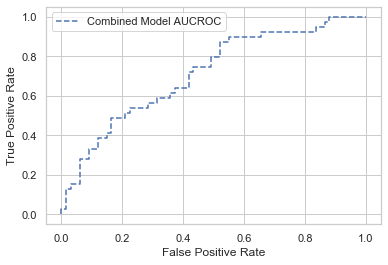

Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


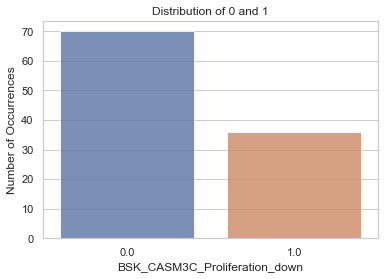

Total Compounds in Assay:  106
Total Selected CP features:  97
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 4  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        14
         1.0       0.67      0.50      0.57         8

    accuracy                           0.73        22
   macro avg       0.71      0.68      0.69        22
weighted avg       0.72      0.73      0.72        22

Total Selected CP features:  112
Tot

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        14
         1.0       0.75      0.43      0.55         7

    accuracy                           0.76        21
   macro avg       0.76      0.68      0.69        21
weighted avg       0.76      0.76      0.74        21

Total Selected CP features:  180
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   16.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   42.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.86      0.75        14
         1.0       0.33      0.14      0.20         7

    accuracy                           0.62        21
   macro avg       0.50      0.50      0.47        21
weighted avg       0.56      0.62      0.57        21

Total Selected CP features:  184
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   15.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   46.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0       0.50      0.43      0.46         7

    accuracy                           0.67        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.66      0.67      0.66        21

Total Selected CP features:  250
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.79      0.73        14
         1.0       0.40      0.29      0.33         7

    accuracy                           0.62        21
   macro avg       0.54      0.54      0.53        21
weighted avg       0.59      0.62      0.60        21



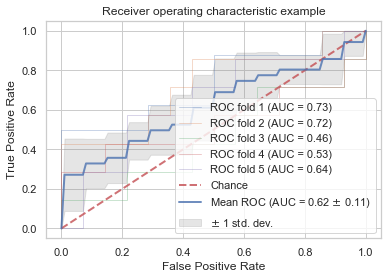

Mean of Each fold


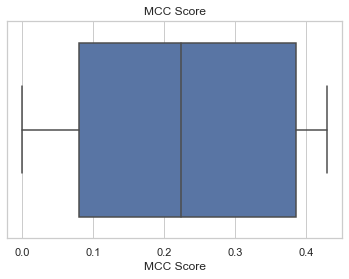

Matthews_corrcoef all:  [0.38575837490522974, 0.4287464628562721, 0.0, 0.22360679774997896, 0.07905694150420949]
Matthews_corrcoef mean:  0.22343371540313806


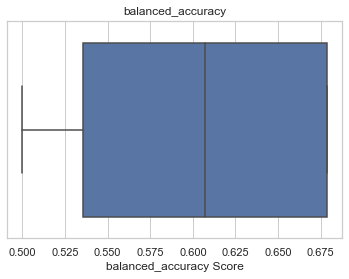

balanced_accuracy all:  [0.6785714285714286, 0.6785714285714286, 0.5, 0.6071428571428571, 0.5357142857142857]
balanced_accuracy mean:  0.6


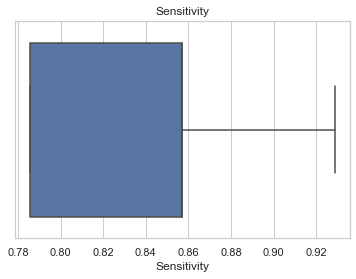

Sensitivity all:  [0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.7857142857142857, 0.7857142857142857]
Sensitivity mean:  0.8428571428571429


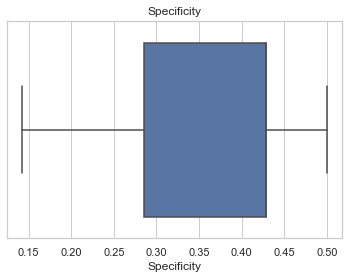

Specificity all:  [0.5, 0.42857142857142855, 0.14285714285714285, 0.42857142857142855, 0.2857142857142857]
Specificity mean:  0.3571428571428571
One Combined Confusion Matrix
conf_matrix: 
  [[59 11]
 [23 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.84      0.78        70
         1.0       0.54      0.36      0.43        36

    accuracy                           0.68       106
   macro avg       0.63      0.60      0.60       106
weighted avg       0.66      0.68      0.66       106

matthews_corrcoef
0.23080770440442477
balanced_accuracy_score
0.601984126984127
Sensitivity
0.8428571428571429
Specificity
0.3611111111111111
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6257936507936508


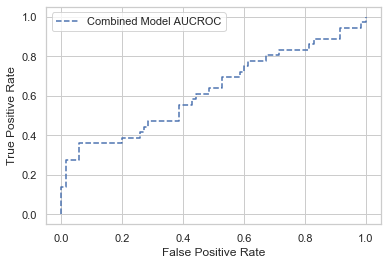

Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


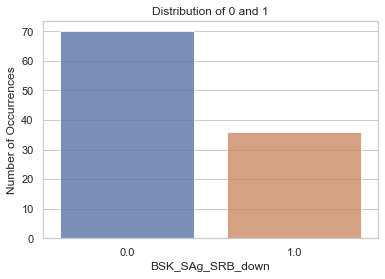

Total Compounds in Assay:  106
Total Selected CP features:  38
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.2s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 6]
 [2 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.57      0.67        14
         1.0       0.50      0.75      0.60         8

    accuracy                           0.64        22
   macro avg       0.65      0.66      0.63        22
weighted avg       0.69      0.64      0.64        22

Total Selected CP features:  114
Total S

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.1s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   48.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        14
         1.0       0.67      0.29      0.40         7

    accuracy                           0.71        21
   macro avg       0.69      0.61      0.61        21
weighted avg       0.70      0.71      0.68        21

Total Selected CP features:  173
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected CP features:  93
Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        14
         1.0       0.67      0.29      0.40         7

    accuracy                           0.71        21
   macro avg       0.69      0.61      0.61        21
weighted avg       0.70      0.71      0.68        21

Total Selected CP features:  98
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   50.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.86      0.75        14
         1.0       0.33      0.14      0.20         7

    accuracy                           0.62        21
   macro avg       0.50      0.50      0.47        21
weighted avg       0.56      0.62      0.57        21



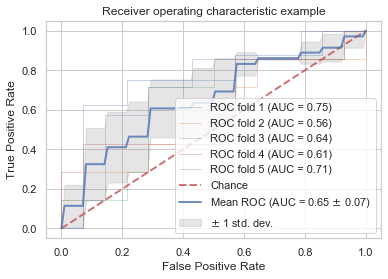

Mean of Each fold


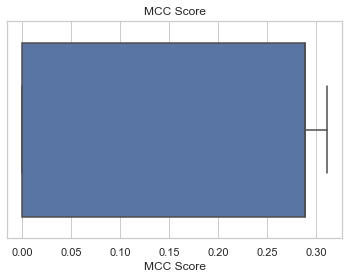

Matthews_corrcoef all:  [0.3105295017040594, 0.28867513459481287, 0.0, 0.28867513459481287, 0.0]
Matthews_corrcoef mean:  0.17757595417873703


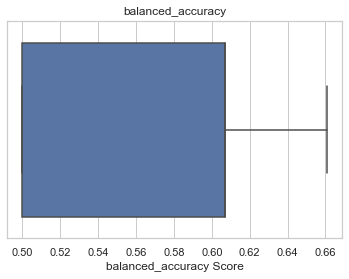

balanced_accuracy all:  [0.6607142857142857, 0.6071428571428572, 0.5, 0.6071428571428572, 0.5]
balanced_accuracy mean:  0.575


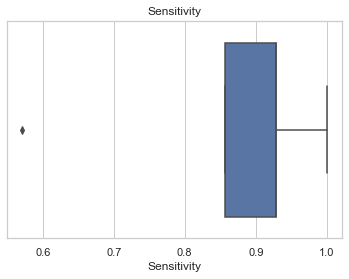

Sensitivity all:  [0.5714285714285714, 0.9285714285714286, 1.0, 0.9285714285714286, 0.8571428571428571]
Sensitivity mean:  0.8571428571428571


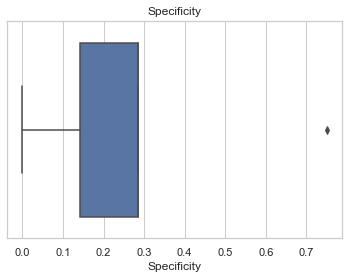

Specificity all:  [0.75, 0.2857142857142857, 0.0, 0.2857142857142857, 0.14285714285714285]
Specificity mean:  0.2928571428571428
One Combined Confusion Matrix
conf_matrix: 
  [[60 10]
 [25 11]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.86      0.77        70
         1.0       0.52      0.31      0.39        36

    accuracy                           0.67       106
   macro avg       0.61      0.58      0.58       106
weighted avg       0.64      0.67      0.64       106

matthews_corrcoef
0.19331452029544596
balanced_accuracy_score
0.5813492063492063
Sensitivity
0.8571428571428571
Specificity
0.3055555555555556
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6341269841269841


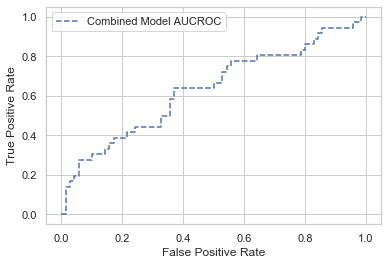

Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


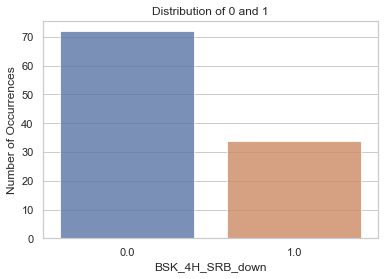

Total Compounds in Assay:  106
Total Selected CP features:  182
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   46.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  2]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        15
         1.0       0.67      0.57      0.62         7

    accuracy                           0.77        22
   macro avg       0.74      0.72      0.73        22
weighted avg       0.77      0.77      0.77        22

Total Selected CP features:  256
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   41.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        14
         1.0       1.00      0.43      0.60         7

    accuracy                           0.81        21
   macro avg       0.89      0.71      0.74        21
weighted avg       0.85      0.81      0.78        21

Total Selected CP features:  421
Total Select

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   51.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.25      0.14      0.18         7

    accuracy                           0.57        21
   macro avg       0.45      0.46      0.45        21
weighted avg       0.51      0.57      0.53        21

Total Selected CP features:  114
Total Select

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        14
         1.0       1.00      0.57      0.73         7

    accuracy                           0.86        21
   macro avg       0.91      0.79      0.82        21
weighted avg       0.88      0.86      0.84        21

Total Selected CP features:  258
Total Select

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   17.9s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   49.6s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  1]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        15
         1.0       0.67      0.33      0.44         6

    accuracy                           0.76        21
   macro avg       0.72      0.63      0.65        21
weighted avg       0.75      0.76      0.73        21



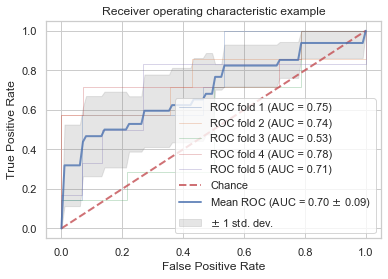

Mean of Each fold


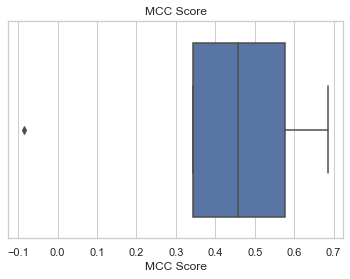

Matthews_corrcoef all:  [0.4581709669115176, 0.5773502691896257, -0.08574929257125442, 0.6859943405700354, 0.3442651863295482]
Matthews_corrcoef mean:  0.3960062940858945


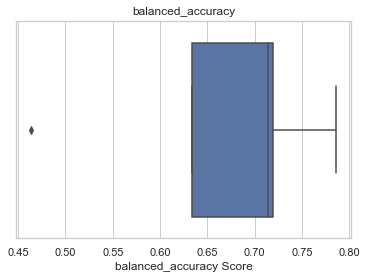

balanced_accuracy all:  [0.719047619047619, 0.7142857142857143, 0.4642857142857143, 0.7857142857142857, 0.6333333333333333]
balanced_accuracy mean:  0.6633333333333333


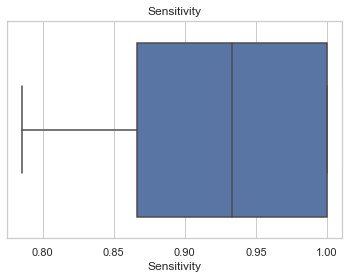

Sensitivity all:  [0.8666666666666667, 1.0, 0.7857142857142857, 1.0, 0.9333333333333333]
Sensitivity mean:  0.917142857142857


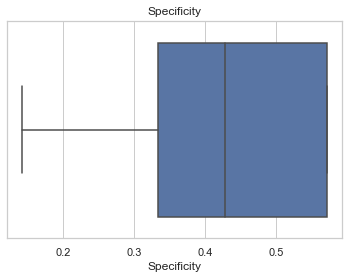

Specificity all:  [0.5714285714285714, 0.42857142857142855, 0.14285714285714285, 0.5714285714285714, 0.3333333333333333]
Specificity mean:  0.4095238095238095
One Combined Confusion Matrix
conf_matrix: 
  [[66  6]
 [20 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.92      0.84        72
         1.0       0.70      0.41      0.52        34

    accuracy                           0.75       106
   macro avg       0.73      0.66      0.68       106
weighted avg       0.75      0.75      0.73       106

matthews_corrcoef
0.3918195653861934
balanced_accuracy_score
0.6642156862745098
Sensitivity
0.9166666666666666
Specificity
0.4117647058823529
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7005718954248367


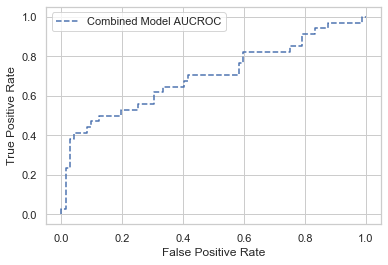

Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


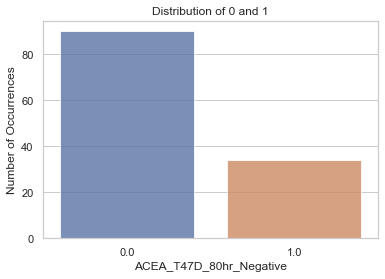

Total Compounds in Assay:  124
Total Selected CP features:  305
Total Selected train:  99
Total Selected test:  25
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   18.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   51.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        18
         1.0       1.00      0.14      0.25         7

    accuracy                           0.76        25
   macro avg       0.88      0.57      0.55        25
weighted avg       0.82      0.76      0.69        25

Total Selected CP features:  176
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   15.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   42.9s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  2]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84        18
         1.0       0.60      0.43      0.50         7

    accuracy                           0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25

Total Selected CP features:  194
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   14.7s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   41.5s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  4.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        18
         1.0       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25

Total Selected CP features:  127
Total Select

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    8.0s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   23.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   52.0s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        18
         1.0       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25

Total Selected CP features:  266
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   11.5s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   32.2s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 5  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        18
         1.0       0.50      0.17      0.25         6

    accuracy                           0.75        24
   macro avg       0.64      0.56      0.55        24
weighted avg       0.70      0.75      0.70        24



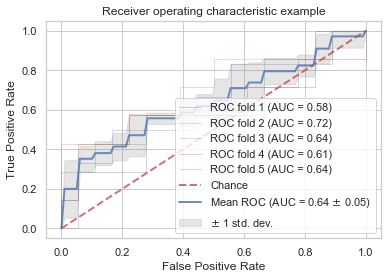

Mean of Each fold


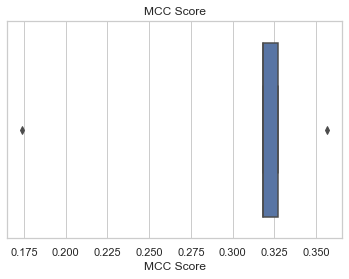

Matthews_corrcoef all:  [0.32732683535398854, 0.3563483225498992, 0.3180099858972217, 0.3180099858972217, 0.17407765595569785]
Matthews_corrcoef mean:  0.2987545571308058


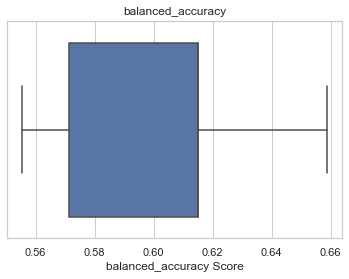

balanced_accuracy all:  [0.5714285714285714, 0.6587301587301587, 0.6150793650793651, 0.6150793650793651, 0.5555555555555556]
balanced_accuracy mean:  0.6031746031746031


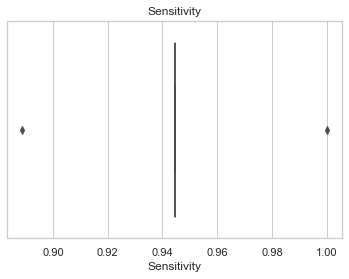

Sensitivity all:  [1.0, 0.8888888888888888, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444]
Sensitivity mean:  0.9444444444444444


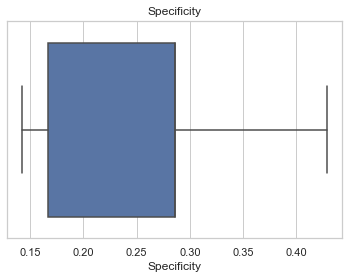

Specificity all:  [0.14285714285714285, 0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.16666666666666666]
Specificity mean:  0.2619047619047619
One Combined Confusion Matrix
conf_matrix: 
  [[85  5]
 [25  9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        90
         1.0       0.64      0.26      0.37        34

    accuracy                           0.76       124
   macro avg       0.71      0.60      0.61       124
weighted avg       0.74      0.76      0.72       124

matthews_corrcoef
0.2948213295054838
balanced_accuracy_score
0.6045751633986928
Sensitivity
0.9444444444444444
Specificity
0.2647058823529412
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6326797385620916


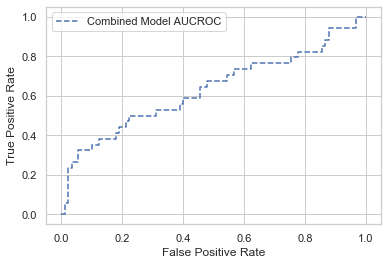

In [20]:
list_of_lists = []

for col in tox_list:
    
    method = "CP_KS_0.02"
    
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5
        
    target=col

    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp=df_temp.dropna(subset=[target])
    df_temp = df_temp.loc[:,df_temp.apply(pd.Series.nunique) != 1]
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)
    
    data=df_temp
    data=data.drop('smiles_r', axis = 1)
    
    X, y = data.loc[:, data.columns != target], data[target]
    
    X=X.values
    y=y.values
    
    print("Total Compounds in Assay: ", len(X))
    
    outercv = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    #combined_y_proba=[[]]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        rows_train= np.concatenate((X_train, y_train[:,None]),axis=1)
        new_df_train = pd.DataFrame(rows_train, columns=data.columns)
        
        rows_test= np.concatenate((X_test, y_test[:,None]),axis=1)
        new_df_test = pd.DataFrame(rows_test, columns=data.columns)
        
        arr=[]
        col_list=[]

        for num in new_df_train.columns:
        
            inactives=new_df_train[num][new_df_train[target]==0]
            actives=new_df_train[num][new_df_train[target]==1]
       
            if (ks_2samp(inactives, actives)[1] <= 0.02):
                col_list.append(num)
        
        print("Total Selected CP features: ",  len(col_list))
        

        train_data=new_df_train[col_list]
        test_data=new_df_test[col_list]
    
        X_train, y_train = train_data.loc[:, train_data.columns != target], train_data[target]
    
        X_train=X_train.values
        y_train=y_train.values
        
        X_test, y_test = test_data.loc[:, test_data.columns != target], test_data[target]
    
        X_test=X_test.values
        y_test=y_test.values
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
               
        param_grid= { 
        'max_depth': [10, 15, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }
        
       
        # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs=40, verbose = 1)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print("Tuned Mode: ", grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        classifier.fit(X_train, y_train)
       
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    print("Mean of Each fold")
       
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print("Matthews_corrcoef mean: ", np.mean(mat_cof))
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print("balanced_accuracy mean: ", np.mean(ba))
        
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print("Sensitivity mean: ", np.mean(sen))
        
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print("Specificity mean: ", np.mean(spe))
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    mcc= matthews_corrcoef(combined_y_test, combined_y_pred)
    print(mcc)

    
    print('balanced_accuracy_score')
    ba= balanced_accuracy_score(combined_y_test, combined_y_pred)
    print(ba)
    
    
    print('Sensitivity')   
    sen=combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1])
    print(sen)
    
    print('Specificity')  
    spe=combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1])
    print(spe)
       
    print("AUC-ROC for the combined results: ")
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    print("Combined Model AUC ROC: ", roc_value_combined_model)
    
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    row=[col, method, sen, spe, ba, mcc, roc_value_combined_model]
    list_of_lists.append(row)
    

  
    

In [21]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "sen", "spe", "ba", "mcc", "auc_roc"])

In [22]:
df

,target,method,sen,spe,ba,mcc,auc_roc
0,BSK_hDFCGF_Proliferation_down,CP_KS_0.02,0.620000,0.589286,0.604643,0.208987,0.626786
1,APR_HepG2_CellLoss_72h_dn,CP_KS_0.02,0.813953,0.533333,0.673643,0.360877,0.680103
2,BSK_3C_Proliferation_down,CP_KS_0.02,0.692308,0.500000,0.596154,0.195790,0.635328
3,BSK_SAg_Proliferation_down,CP_KS_0.02,0.724138,0.416667,0.570402,0.147996,0.577586
4,BSK_3C_SRB_down,CP_KS_0.02,0.672131,0.488889,0.580510,0.162718,0.574135
5,BSK_3C_Vis_down,CP_KS_0.02,0.876923,0.536585,0.706754,0.447060,0.731332
6,APR_HepG2_CellLoss_24h_dn,CP_KS_0.02,0.872727,0.424242,0.648485,0.337290,0.682645
7,BSK_LPS_SRB_down,CP_KS_0.02,0.835821,0.487179,0.661500,0.345784,0.711825
8,BSK_CASM3C_Proliferation_down,CP_KS_0.02,0.842857,0.361111,0.601984,0.230808,0.625794
9,BSK_SAg_SRB_down,CP_KS_0.02,0.857143,0.305556,0.581349,0.193315,0.634127


In [23]:
file_name="Metrics_KFold_Aggregated"+method+".csv"
df.to_csv(file_name)